**DIWALI SALES ANALYSIS**

![Alt text](image.png)

Importing all required libraries

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [377]:
diwali_df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [378]:
print(diwali_df.shape)
diwali_df.head(10)

(11251, 15)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


As we can see we have 11251 rows and 15 columns in this given dataset

**DATA CLEANING**

In [379]:
diwali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [380]:
diwali_df.drop(['Status','unnamed1'],axis =1 , inplace= True)

In [381]:
diwali_df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [382]:
diwali_df.dropna(inplace= True)
diwali_df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [383]:
diwali_df['Amount'] = diwali_df['Amount'].astype('int')
diwali_df['Amount'].dtype

dtype('int32')

In [384]:
diwali_df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [385]:
diwali_df.rename(columns={'Marital_Status':'Married'} , inplace= True)
diwali_df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Married', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

In [386]:
diwali_df.describe()

,User_ID,Age,Married,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


**Exploratory Data Analysis**

Let's write some business questions
1.  Which gender buys the most products
2.  Which gender spent the most amount of money
3.  Which age group / age has the most number of orders
4.  Which category is famous in different age groups
5.  Do married people tend to purchase more products compared to unmarried in diwali season
6.  Which state had the best sales?
7.  Does occupation play a role in money spent during diwali shopping ?
8.  which category is popular for married people Vs unmarried people ?
9. Top category in each state


In [387]:
# Answer 1
Males = diwali_df.loc[diwali_df['Gender'] == 'M','Gender'].count()
Females = diwali_df.loc[diwali_df['Gender'] == 'F','Gender'].count()
print("Total Males: " ,Males )
print("Total Females: " ,Females )
print("Males % : ",Males/(Males + Females))
print("Female % :",Females/(Males + Females))

Total Males:  3407
Total Females:  7832
Males % :  0.30314084882996706
Female % : 0.6968591511700329



We can see that females in general prefer to shop more than males during diwali season.

In [388]:
# Answer 2
Gender_vs_spent =  diwali_df.groupby(['Gender'])['Amount'].sum().sort_values(ascending= False)
print(Gender_vs_spent)
print("Females spent ",Gender_vs_spent['F'] - Gender_vs_spent['M'], "more than males")


Gender
F    74335853
M    31913276
Name: Amount, dtype: int32
Females spent  42422577 more than males


  Age Group    Amount
2     26-35  42613442
3     36-45  22144994
1     18-25  17240732
4     46-50   9207844
5     51-55   8261477
6       55+   4080987
0      0-17   2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

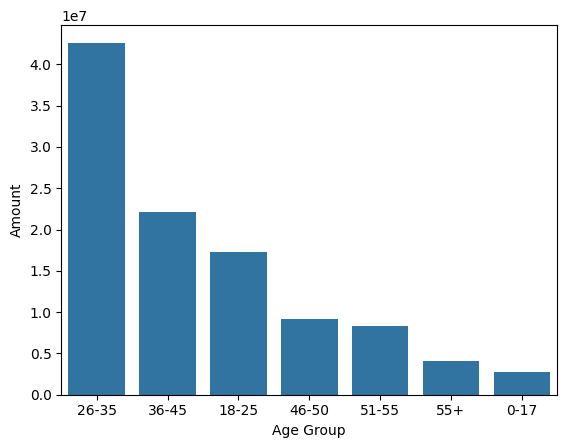

In [389]:
# Answer 3
Age_vs_spent = diwali_df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending= False)
print(Age_vs_spent)
sns.barplot(data= Age_vs_spent,x='Age Group',y='Amount')

In [390]:
#Answer 4
Age_Vs_Product = diwali_df[['Product_Category' , 'Age Group']]
Age_Vs_Product_dummies = pd.get_dummies(Age_Vs_Product['Product_Category'])
Age_Vs_Product_dummies = Age_Vs_Product_dummies.join(Age_Vs_Product['Age Group'])
df = Age_Vs_Product_dummies.groupby(['Age Group'] ,as_index= False).sum().sort_values(by = 'Age Group')
df.set_index('Age Group', inplace=True)
max_counts = df.idxmax(axis=1)
print(max_counts)

Age Group
0-17                   Food
18-25                  Food
26-35    Clothing & Apparel
36-45    Clothing & Apparel
46-50    Clothing & Apparel
51-55    Clothing & Apparel
55+      Clothing & Apparel
dtype: object


In [391]:
df

,Auto,Beauty,Books,Clothing & Apparel,Decor,Electronics & Gadgets,Food,Footwear & Shoes,Furniture,Games & Toys,Hand & Power Tools,Household items,Office,Pet Care,Sports Products,Stationery,Tupperware,Veterinary
Age Group,,,,,,,,,,,,,,,,,,
0-17,3,9,1,72,1,61,83,6,13,10,0,14,5,3,10,4,0,1
18-25,17,77,20,469,19,343,478,45,68,51,6,115,24,34,66,17,17,13
26-35,43,164,41,1057,33,832,991,424,136,163,10,271,41,87,134,53,19,42
36-45,18,82,22,532,23,413,454,305,69,84,7,75,23,37,82,24,19,14
46-50,4,33,9,234,10,186,213,120,29,35,0,23,7,32,27,6,9,6
51-55,8,37,7,188,5,177,168,108,26,28,1,14,7,13,27,6,7,3
55+,4,20,3,103,5,75,103,51,11,15,2,8,6,6,10,2,1,2


   Married    Amount
0        0  62125384
1        1  44123745
Married people contribute to :  41.52857102480341
Married people contribute to :  58.47142897519658


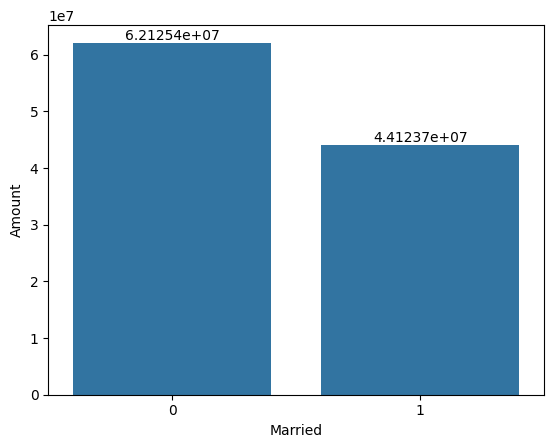

In [392]:
# Answer 5
married_sales = diwali_df.groupby(['Married'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending= False)
print(married_sales)
totalsales = married_sales['Amount'].sum()
totalsales_non = married_sales['Amount'][0].sum()
totalsales_mar = married_sales['Amount'][1].sum()
print("Married people contribute to : ",(totalsales_mar/ totalsales)*100 )
print("Married people contribute to : ",(totalsales_non/ totalsales)*100 )
ax = sns.barplot(data= married_sales , x= 'Married', y = 'Amount')
for bar in ax.containers:
    ax.bar_label(bar)

               State    Amount
14     Uttar Pradesh  19374968
10       Maharashtra  14427543
7          Karnataka  13523540
2              Delhi  11603818
9     Madhya Pradesh   8101142
0     Andhra Pradesh   8037146
5   Himachal Pradesh   4963368
4            Haryana   4220175
1              Bihar   4022757
3            Gujarat   3946082
8             Kerala   3894491
6          Jharkhand   3026456
15       Uttarakhand   2520944
12         Rajasthan   1909409
11            Punjab   1525800
13         Telangana   1151490


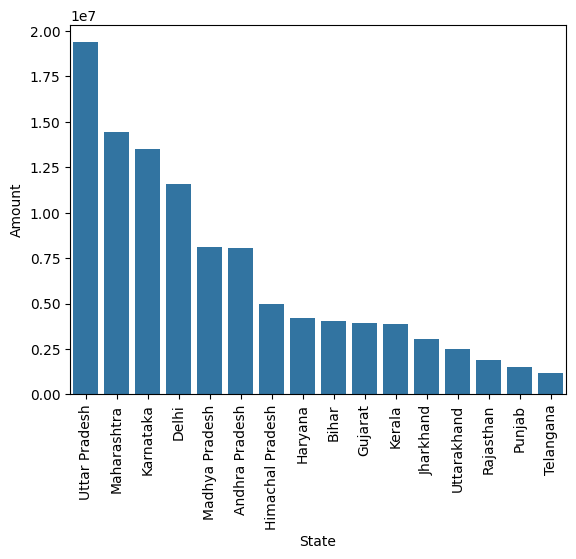

In [393]:
# Answer 6
state_sales =  diwali_df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending= False)
print(state_sales)
ax = sns.barplot(data = state_sales , x= 'State' , y='Amount')
plt.xticks(rotation = 90)
plt.show()


         Occupation    Amount
10        IT Sector  14755079
8        Healthcare  13034586
2          Aviation  12602298
3           Banking  10770610
7              Govt   8517212
9       Hospitality   6376405
12            Media   6295832
1        Automobile   5368596
4          Chemical   5297436
11           Lawyer   4981665
13           Retail   4783170
6   Food Processing   4070670
5      Construction   3597511
14          Textile   3204972
0       Agriculture   2593087


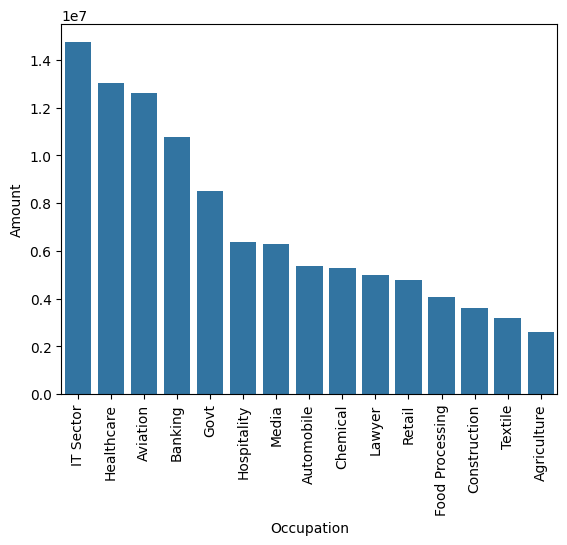

In [394]:
# Answer 7
occ_sales =  diwali_df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending= False)
print(occ_sales)
ax = sns.barplot(data = occ_sales , x= 'Occupation' , y='Amount')
plt.xticks(rotation = 90)
plt.show()

In [395]:
# Answer 8
Married_top_product = diwali_df[['Product_Category' , 'Married']]
Married_top_product_dummies = pd.get_dummies(Married_top_product['Product_Category'])
Married_top_product_dummies = Married_top_product_dummies.join(Married_top_product['Married'])
df2 = Married_top_product_dummies.groupby(['Married'] ,as_index= False).sum().sort_values(by = 'Married')
df2.set_index('Married', inplace=True)
max_count = df2.idxmax(axis=1)
print(max_count)

Married
0    Clothing & Apparel
1    Clothing & Apparel
dtype: object


In [396]:
df2.transpose().sort_values(by=[0,1], ascending= False)

Married,0,1
Clothing & Apparel,1535,1120
Food,1500,990
Electronics & Gadgets,1174,913
Footwear & Shoes,613,446
Household items,295,225
Beauty,242,180
Sports Products,234,122
Games & Toys,227,159
Furniture,206,146
Pet Care,121,91


         Product_Category    Amount
6                    Food  33933883
3      Clothing & Apparel  16495019
5   Electronics & Gadgets  15643846
7        Footwear & Shoes  15575209
8               Furniture   5440051
9            Games & Toys   4331694
14        Sports Products   3635933
1                  Beauty   1959484
0                    Auto   1958609
15             Stationery   1676051
11        Household items   1569337
16             Tupperware   1155642
2                   Books   1061478
4                   Decor    730360
13               Pet Care    482277
10     Hand & Power Tools    405618
17             Veterinary    112702
12                 Office     81936


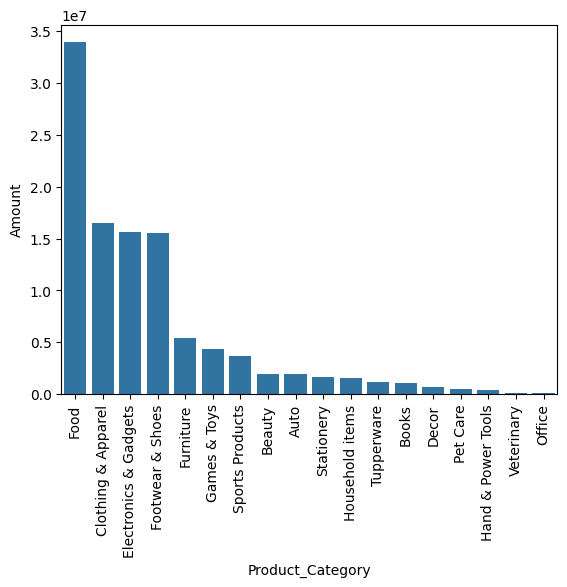

In [397]:
product_sales =  diwali_df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending= False)
print(product_sales)
ax = sns.barplot(data = product_sales , x= 'Product_Category' , y='Amount')
plt.xticks(rotation = 90)
plt.show()

     Product_ID  Orders
1679  P00265242     127
644   P00110942     116
1504  P00237542      91
1146  P00184942      82
679   P00114942      79
...         ...     ...
427   P00066142       1
1333  P00213442       1
418   P00064342       1
416   P00064142       1
875   P00142742       1

[2350 rows x 2 columns]


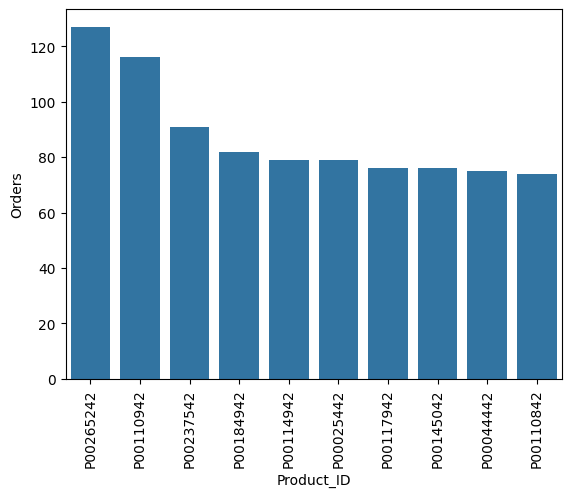

In [398]:
product_sales =  diwali_df.groupby(['Product_ID'], as_index= False)['Orders'].sum().sort_values(by='Orders',ascending= False)
print(product_sales)
ax = sns.barplot(data = product_sales[:10] , x= 'Product_ID' , y='Orders')
plt.xticks(rotation = 90)
plt.show()

In [399]:
# Answer 9
state_category_counts_me = diwali_df.groupby(['State', 'Product_Category'], as_index= False).size()
res = state_category_counts_me.groupby(['State'])['size'].transform(max) == state_category_counts_me['size']
state_category_counts_me[res]

C:\Users\shiva\AppData\Local\Temp\ipykernel_3772\416917319.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  res = state_category_counts_me.groupby(['State'])['size'].transform(max) == state_category_counts_me['size']


,State,Product_Category,size
4,Andhra Pradesh,Electronics & Gadgets,277
19,Bihar,Clothing & Apparel,140
37,Delhi,Footwear & Shoes,335
51,Gujarat,Clothing & Apparel,113
65,Haryana,Clothing & Apparel,123
81,Himachal Pradesh,Clothing & Apparel,240
97,Jharkhand,Clothing & Apparel,148
114,Karnataka,Footwear & Shoes,338
126,Kerala,Clothing & Apparel,182
143,Madhya Pradesh,Food,209
